In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
bench = pd.read_csv('results/Columbia/baseline.csv', index_col=0)
MIMO_full = pd.read_csv('results/Columbia/10runs/2fulldata_LSTM10.csv', index_col=0)
MIMO = pd.read_csv('results/Columbia/10runs/2LSTM_MIMO10.csv', index_col=0)
condRNN = pd.read_csv('results/Columbia/10runs/2ConditionalRNN10_sequential.csv', index_col=0)
datasets = [MIMO, condRNN, MIMO_full]

FileNotFoundError: [Errno 2] No such file or directory: 'results/Columbia/10runs/2fulldata_LSTM10.csv'

In [57]:
condRNN_global = pd.read_csv('results/Columbia/global/fulldata_LSTM.csv', index_col=0)

In [52]:
means = []
stds = []
datasets2 = [MIMO, condRNN, MIMO_full, bench, condRNN_global]
#means.append(35.58681558224254)
#stds.append(0)
for df in datasets2:
    #means.append(df['mape'].mean())
    #stds.append(df['mape'].std())
    means.append(df['rmse'].mean())
    stds.append(df['rmse'].mean())

In [53]:
means

[0.7225299133446552,
 0.6951992085880323,
 0.7163537522559956,
 0.7420941931322251,
 0.5901667137677951]

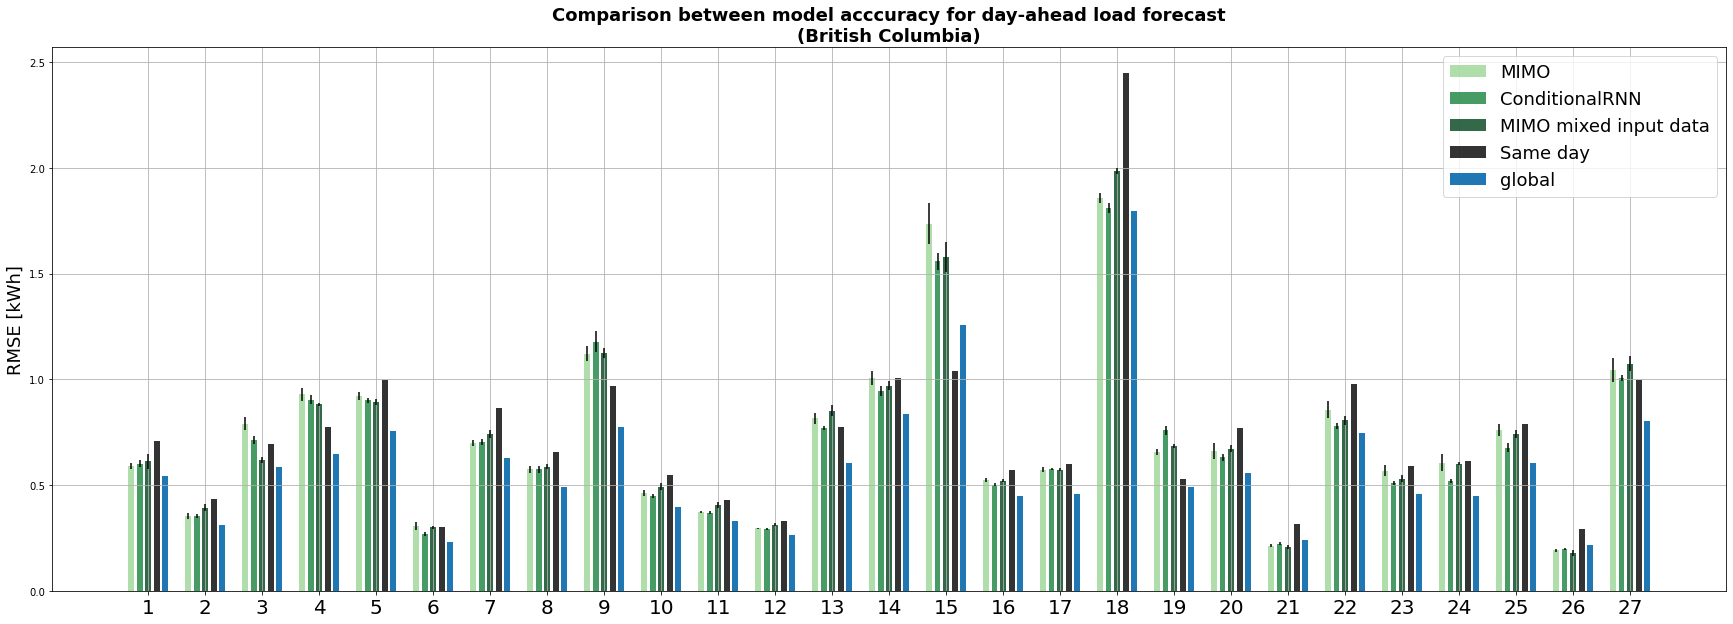

In [73]:
fig, ax = plt.subplots()
colors=["green", "green", "green", "black"]
labels = ['MIMO', 'ConditionalRNN', 'MIMO mixed input data', 'Same day']
x = np.array(range(1,55,2))
my_cmap = plt.get_cmap("Greens")
for i,df in enumerate(datasets):
    means = df.groupby('B')['rmse'].mean()
    stds = df.groupby('B')['rmse'].std()
    ax.bar(x, means, yerr=stds, alpha=0.8, width=0.2, color=my_cmap((i+1)*100),label=labels[i])
    x = x+0.3
i = 3
ax.bar(x, bench['rmse'], alpha=0.8, width=0.2, label=labels[i], color=colors[i])
ax.bar(x+0.3, condRNN_global['rmse'].drop(27), width=0.2, label='global')
plt.xticks(ticks=np.array(range(1,55,2))+0.6, labels=np.array(range(1,28)), fontsize=20)
plt.title('Comparison between model acccuracy for day-ahead load forecast\n(British Columbia)', fontsize=18, fontweight='bold')
plt.ylabel('RMSE [kWh]', fontsize=18)
plt.legend(fontsize=18)
plt.grid()
plt.rcParams['figure.figsize'] = (30, 10)
plt.show()

No handles with labels found to put in legend.


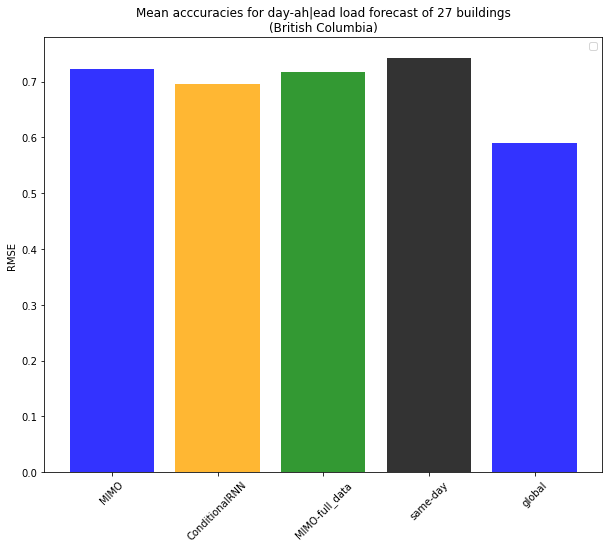

In [54]:
plt.rcParams['figure.figsize'] = (10, 8)
colors=["blue", "orange", "green", "black"]
labels = ['MIMO', 'ConditionalRNN', 'MIMO-full_data', 'same-day', 'global']
#plt.grid(zorder=0)
plt.bar(range(len(means)), means, align='center', color=colors, alpha=0.8, zorder=1)
plt.xticks(ticks=range(len(means)), labels=labels,
           rotation=45)
plt.title('Mean acccuracies for day-ah|ead load forecast of 27 buildings\n(British Columbia)')
plt.ylabel('RMSE')
plt.legend()
plt.show()